# Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# Import Data 
(Classification data = binary)

In [2]:
df = pd.read_csv('C:/Data_science/Data Preprocessing/algorithms comparison/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
target_name = 'Diabetes_binary'
feature_name = list(df.columns.drop(target_name))

X = df[feature_name]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# Set list of model

In [4]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# Loop models by Cross validation

In [10]:
results = []
names = []

for name, model in models:
    cvs = cross_val_score(model, X_train, y_train, cv=10)
    results.append(cvs)
    names.append(name)
    print(name , cvs.mean(), cvs.std())

LR 0.8626911816839392 0.001254801750634629
kNN 0.8478989252178731 0.0018058129162406397
NB 0.7740657748684872 0.0022980438473193285
RFC 0.8603013724852211 0.0013244706447796332
DT 0.7978062780161923 0.0017615355925752543


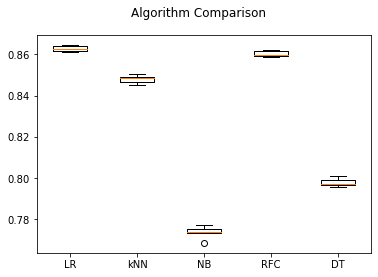

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()